<a href="https://colab.research.google.com/github/bonnieliu2002/CSM146/blob/main/ps2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This code was adapted from course material by Jenna Wiens (UMichigan).

import sys

In [ ]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Please specify the full paths to the regression_train.csv
# and regression_test.csv files in your gdrive directory
### ========== TODO : START ========== ###
train_path = '/content/gdrive/My Drive/CS M146/regression_train.csv'
test_path = '/content/gdrive/My Drive/CS M146/regression_test.csv'
### ========== TODO : END ========== ###

In [ ]:
# Use only the provided packages!
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
######################################################################
# classes
######################################################################

class Data :
    
    def __init__(self, X=None, y=None) :
        """
        Data class.
        
        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """
        
        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y
    
    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.
        
        Parameters
        --------------------
            filename -- string, filename
        """
        
        # load data
        with open(filename, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")
        
        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]
    
    def plot(self, **kwargs) :
        """Plot data."""
        
        if 'color' not in kwargs :
            kwargs['color'] = 'b'
        
        fig = plt.figure(figsize=(10, 5))
        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.show()

In [ ]:
# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)

In [ ]:
def plot_erms(mrange, train_errs, test_errs):
    fig = plt.figure(figsize=(10, 5))
    plt.plot(mrange, train_errs, 'o-', color='red', label='Training')
    plt.plot(mrange, test_errs, 'o-', color='blue', label='Test')
    plt.xlabel(r'$m$', fontsize = 16)
    plt.ylabel(r'$E_{RMS}$', fontsize = 16)
    plt.title('Polynomial regression error')
    plt.legend()
    plt.show()

In [ ]:
class PolynomialRegression() :
    
    def __init__(self, m=1) :
        """
        Ordinary least squares regression.
        
        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
        """
        self.coef_ = None
        self.m_ = m
    
    
    def generate_polynomial_features(self, X) :
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features
        
        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """
        
        n,d = X.shape
        
        ### ========== TODO : START ========== ###
        # part b: modify to create matrix for simple linear model
        Phi = np.insert(X, 0, 1, axis=1)
        # part g: modify to create matrix for polynomial model
        m = self.m_
        newPhi = []
        for i in range(0, Phi.shape[0]):
          row = []
          for j in range(0, m + 1):
            row.append(pow(Phi[i][1], j))
          newPhi.append(row)
        Phi = np.array(newPhi)

        ### ========== TODO : END ========== ###
        
        return Phi
    
    
    def fit_GD(self, X, y, eta=None,
                eps=0, tmax=10000, verbose=False) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes
        
        Returns
        --------------------
            self    -- an instance of self
        """
        
        if verbose :
            plt.subplot(1, 2, 2)
            plt.xlabel('iteration')
            plt.ylabel(r'$J(\theta)$')
            plt.ion()
            plt.show()
        
        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)                 # coefficients
        err_list  = np.zeros((tmax,1))           # errors per iteration
        
        # GD loop
        for t in range(tmax) :
            ### ========== TODO : START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            if eta_input is None :
                eta = float(1) / (1 + t) # change this line
            else :
                eta = eta_input
            ### ========== TODO : END ========== ###
                
            ### ========== TODO : START ========== ###
            # part d: update theta (self.coef_) using one step of GD
            # hint: you can write simultaneously update all theta using vector math
            self.coef_ = self.coef_ - 2 * eta * np.dot(np.dot(self.coef_, X.T) - y, X)
            
            # track error
            # hint: you cannot use self.predict(...) to make the predictions
            y_pred = np.dot(self.coef_, X.T)
            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)                
            ### ========== TODO : END ========== ###
            
            # stop?
            if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
                break
            
            # debugging
            if verbose :
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                plt.subplot(1, 2, 1)
                plt.cla()
                plot_data(x, y)
                self.plot_regression()
                plt.subplot(1, 2, 2)
                plt.plot([t+1], [cost], 'bo')
                plt.suptitle('iteration: %d, cost: %f' % (t+1, cost))
                plt.draw()
                plt.pause(0.05) # pause for 0.05 sec
        
        print('number of iterations: %d' % (t+1))
        
        return self
    
    
    def fit(self, X, y) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            
        Returns
        --------------------        
            self    -- an instance of self
        """
        
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO : START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        #       be sure to update self.coef_ with your solution
        self.coef_ = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
        return self
        ### ========== TODO : END ========== ###
    
    
    def predict(self, X) :
        """
        Predict output for X.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
        
        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None :
            raise Exception("Model not initialized. Perform a fit first.")
        
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO : START ========== ###
        # part c: predict y
        y = np.dot(self.coef_, X.T)
        ### ========== TODO : END ========== ###
        
        return y
    
    
    def cost(self, X, y) :
        """
        Calculates the objective function.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            cost    -- float, objective J(theta)
        """
        ### ========== TODO : START ========== ###
        # part d: compute J(theta)
        cost = sum(pow(self.predict(X)-y,2))
        ### ========== TODO : END ========== ###
        return cost
    
    
    def rms_error(self, X, y) :
        """
        Calculates the root mean square error.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== TODO : START ========== ###
        # part h: compute RMSE
        error = np.sqrt(self.cost(X, y) / X.shape[0])
        ### ========== TODO : END ========== ###
        return error
    
    
    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs) :
        """Plot regression line."""
        if 'color' not in kwargs :
            kwargs['color'] = 'r'
        if 'linestyle' not in kwargs :
            kwargs['linestyle'] = '-'
        
        X = np.reshape(np.linspace(0,1,n), (n,1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()


Part A
Visualizing data...
Training data


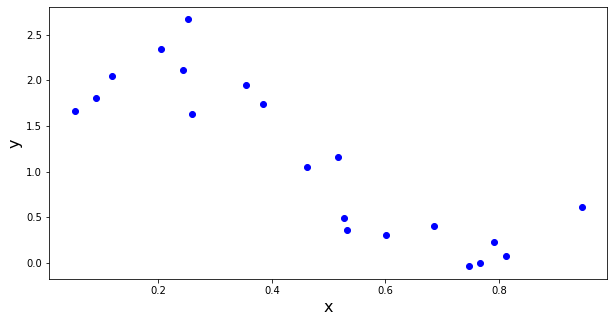

Testing data


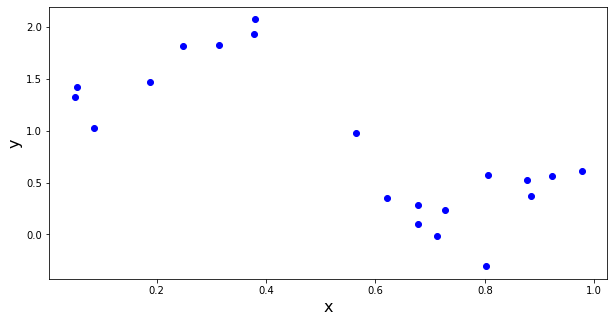





Part B
Investigating linear regression...
original
[[0.515773]
 [0.790645]
 [0.685289]
 [0.946009]
 [0.53169 ]
 [0.118853]
 [0.600345]
 [0.090962]
 [0.355033]
 [0.204493]
 [0.812833]
 [0.252854]
 [0.527025]
 [0.260206]
 [0.244096]
 [0.383914]
 [0.767244]
 [0.461121]
 [0.746685]
 [0.052486]]
add ones column
[[1.       0.515773]
 [1.       0.790645]
 [1.       0.685289]
 [1.       0.946009]
 [1.       0.53169 ]
 [1.       0.118853]
 [1.       0.600345]
 [1.       0.090962]
 [1.       0.355033]
 [1.       0.204493]
 [1.       0.812833]
 [1.       0.252854]
 [1.       0.527025]
 [1.       0.260206]
 [1.       0.244096]
 [1.       0.383914]
 [1.       0.767244]
 [1.       0.461121]
 [1.       0.746685]
 [1.       0.052486]]




Part D
Model cost should equal 40.234. Our code results in model cost of 40.233847409671.

For eta = 1e-06,
number of iterations: 10000
cost: 25.86329625891011
coefficients: [0.36400847 0.09215787]

For eta = 1e-05,
number of iterations: 10000
cost: 13.1588985557

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:108: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:104: RuntimeWarning: overflow encountered in power
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in subtract


number of iterations: 10000
cost: nan
coefficients: [nan nan]




Part E
closed form coefficients: [ 2.44640709 -2.81635359]
closed form cost: 3.9125764057914636



Part F
After setting a learning rate for GD that is a function of k,
number of iterations: 1731
[ 2.44640672 -2.81635284]




Part I
Investigating polynomial regression...
m = 0
Training data rms error: 0.857060623443959
Testing data rms error: 0.747268364185172
m = 1
Training data rms error: 0.44229946901344247
Testing data rms error: 0.5935949636028293
m = 2
Training data rms error: 0.44131496568291906
Testing data rms error: 0.5957110445316883
m = 3
Training data rms error: 0.2442692189841879
Testing data rms error: 0.37194297617205596
m = 4
Training data rms error: 0.22968276125805662
Testing data rms error: 0.36393172002169155
m = 5
Training data rms error: 0.2268113305178319
Testing data rms error: 0.35513774289024114
m = 6
Training data rms error: 0.22445294828005305
Testing data rms error: 0.3674501692231871
m = 7
T

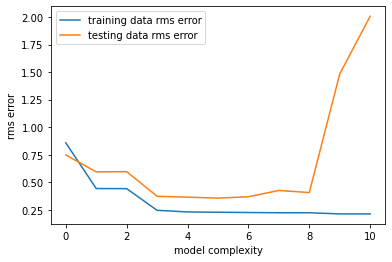

In [ ]:
######################################################################
# main
######################################################################

def main():
    # load data
    train_data = load_data(train_path)
    test_data = load_data(test_path)
    
    
    # ### ========== TODO : START ========== ###
    # part a: main code for visualizations
    print("Part A")
    print('Visualizing data...')
    print("Training data")
    plot_data(train_data.X, train_data.y)
    print("Testing data")
    plot_data(test_data.X, test_data.y)
    print("\n\n\n")
    # ### ========== TODO : END ========== ###
    
    
    
    # ### ========== TODO : START ========== ###
    # parts b-f: main code for linear regression
    # part b
    print("Part B")
    print('Investigating linear regression...')
    print("original")
    print(train_data.X)
    print("add ones column")
    polyreg = PolynomialRegression()
    X = polyreg.generate_polynomial_features(train_data.X)
    print(X)
    print("\n\n\n")

    # part d
    print("Part D")
    train_data = load_data(train_path)
    model = PolynomialRegression()
    model.coef_ = np.zeros(2)
    print("Model cost should equal 40.234. Our code results in model cost of " + str(model.cost(train_data.X, train_data.y)) + ".\n")

    etas = [pow(10, -6), pow(10, -5), pow(10, -3), 0.05]
    for e in etas:
      print("For eta = " + str(e) + ",")
      m = model.fit_GD(train_data.X, train_data.y, eta=e)
      print("cost: " + str(m.cost(train_data.X, train_data.y)))
      print("coefficients: " + str(m.coef_) + "\n")
    print("\n\n")

    # part e
    print("Part E")
    m = model.fit(train_data.X, train_data.y)
    print("closed form coefficients: " + str(m.coef_))
    print("closed form cost: " + str(m.cost(train_data.X, train_data.y)) + "\n\n\n")

    # part f
    print("Part F")
    print("After setting a learning rate for GD that is a function of k,")
    m = model.fit_GD(train_data.X, train_data.y)
    print(m.coef_)
    print("\n\n\n")

    # ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression
    print("Part I")
    print('Investigating polynomial regression...')
    m = range(11)
    training_data_rms_errors = []
    testing_data_rms_errors = []
    for i in m:
      polyreg = PolynomialRegression(i)
      pr = polyreg.fit(train_data.X, train_data.y)
      training_data_rms_error = pr.rms_error(train_data.X, train_data.y)
      testing_data_rms_error = pr.rms_error(test_data.X, test_data.y)
      training_data_rms_errors.append(training_data_rms_error)
      testing_data_rms_errors.append(testing_data_rms_error)
      print("m = " + str(i))
      print("Training data rms error: " + str(training_data_rms_error))
      print("Testing data rms error: " + str(testing_data_rms_error))
    plt.plot(m, training_data_rms_errors, label="training data rms error")
    plt.plot(m, testing_data_rms_errors, label="testing data rms error")
    plt.legend()
    plt.xlabel("model complexity")
    plt.ylabel("rms error")
    ### ========== TODO : END ========== ###
    
    
    print("Done!")

if __name__ == "__main__":
    main()
